Chapter 7 Homework:

Use the stock_analysis package to complete the following exercises. Unless otherwise noted, use data from 2019 through the end of 2020. In case there are any issues collecting the data with the `StockReader` class, backup CSV files are provided in the exercises/ directory:

    1. Using the StockAnalyzer and StockVisualizer classes, calculate and plot three levels of support and resistance for Netflix's closing price.

In [2]:
%matplotlib inline
import stock_analysis
from stock_analysis.utils import group_stocks
import pandas as pd

start = '2019-01-01'
end = '2020-12-31'

"""
rdr = stock_analysis.StockReader(start, end)
"""
fb = pd.read_csv('./data/facebook.csv',index_col='date', parse_dates=True)
aapl = pd.read_csv('./data/apple.csv',index_col='date', parse_dates=True)
amzn = pd.read_csv('./data/amazon.csv',index_col='date', parse_dates=True)
nflx = pd.read_csv('./data/netflix.csv',index_col='date', parse_dates=True).sort_index()['2019-01-01':'2020-12-31']
goog = pd.read_csv('./data/google.csv',index_col='date', parse_dates=True)

"""
fb, aapl, amzn, nflx, goog = (
    pd.read_csv(ticker)
    for ticker in ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)
"""



"\nfb, aapl, amzn, nflx, goog = (\n    pd.read_csv(ticker)\n    for ticker in ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']\n)\n"

Text(0, 0.5, 'price ($)')

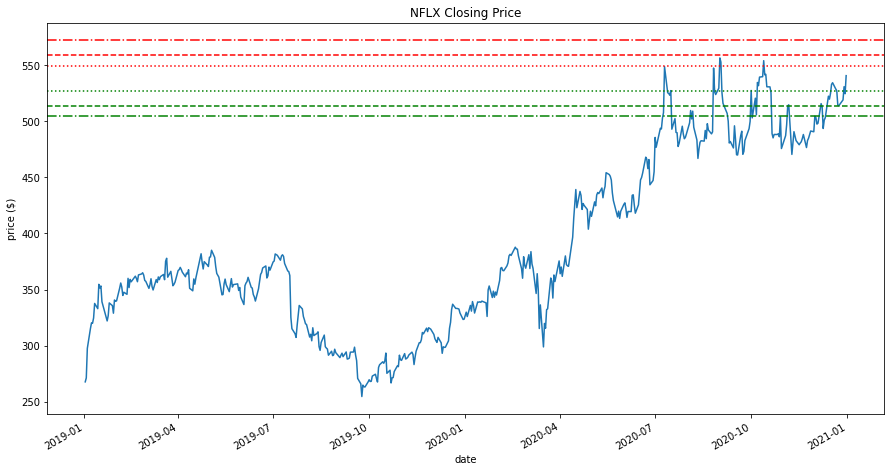

In [3]:
import itertools

def levels(analyzer, method):
    return [getattr(analyzer, method)(i) for i in range(1, 4)]


nflx_analyzer = stock_analysis.StockAnalyzer(nflx)
support_levels, resistance_levels = (
    levels(nflx_analyzer, metric) for metric in ['support', 'resistance']
)

nflx_viz = stock_analysis.StockVisualizer(nflx)
ax = nflx_viz.evolution_over_time('close', figsize=(15, 8), title='NFLX Closing Price')

for support, resistance, linestyle, level in zip(
    support_levels, resistance_levels, 
    [':', '--', '-.'], itertools.count(1)
):
    nflx_viz.add_reference_line(
        ax, 
        y=support, 
        label=f'support level {level}', 
        color='green', 
        linestyle=linestyle
    )
    nflx_viz.add_reference_line(
        ax, 
        y=resistance, 
        label=f'resistance level {level}', 
        color='red', 
        linestyle=linestyle
    )
ax.get_legend().remove()
ax.set_ylabel('price ($)')

    2. With the StockVisualizer class, look at the effect of after-hours trading on the FAANG stocks:
        a) As individual stocks:


array([[<AxesSubplot:title={'center':"Amazon Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Amazon after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Apple Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Apple after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Facebook Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Facebook after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Google Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Google after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Netflix Open Price - Prior Day's Close"}, xlabel='da

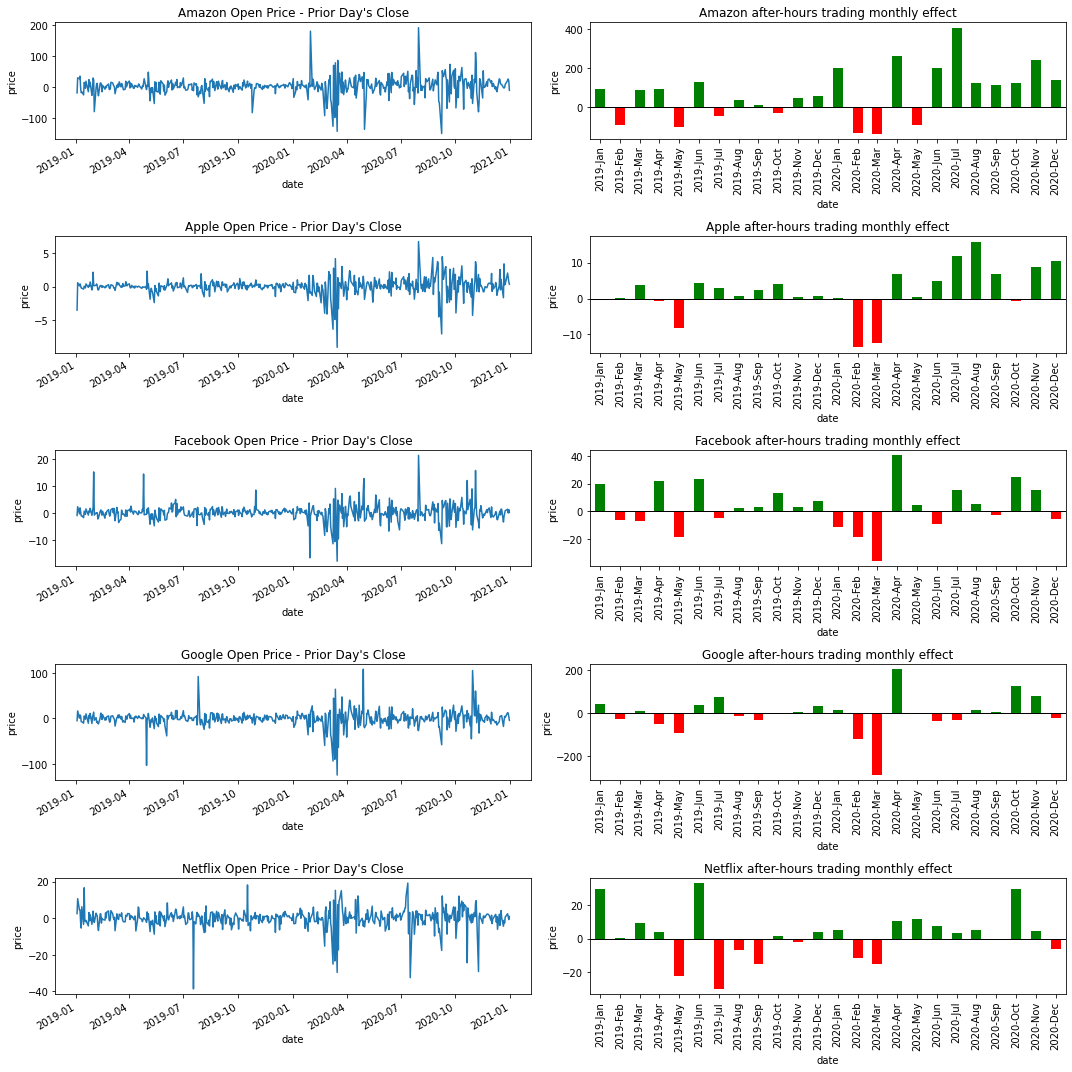

In [4]:
faang = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

stock_analysis.AssetGroupVisualizer(faang).after_hours_trades()

        b) As a portfolio using the make_portfolio() function from the stock_analysis.utils module

array([<AxesSubplot:title={'center':"After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <AxesSubplot:title={'center':'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

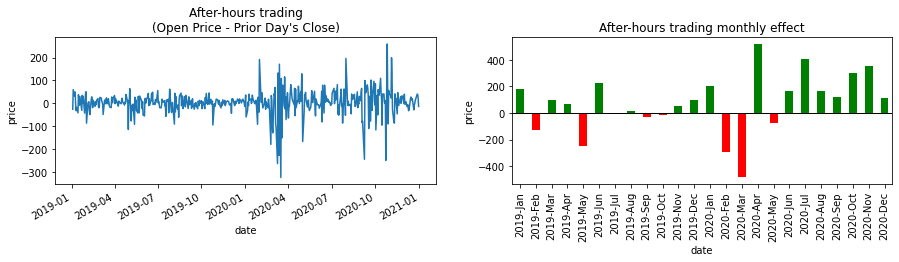

In [5]:
from stock_analysis.utils import make_portfolio

stock_analysis.StockVisualizer(make_portfolio(faang)).after_hours_trades()


3. Using the StockVisualizer.open_to_close() method, create a plot that fills the area between the FAANG stocks' opening price (as a portfolio) and its closing price each day in red if the price declined and in green if the price increased. As a bonus, do the same for a portfolio of bitcoin and the S&P 500.

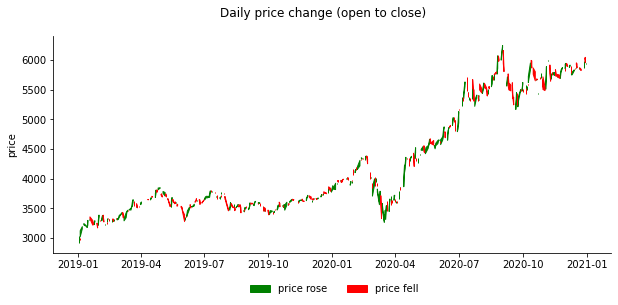

In [6]:
ax = stock_analysis.StockVisualizer(make_portfolio(faang)).open_to_close()

4. Compare a Mutual Fund or ETF of your choice to three of its largest stocks (by composition) using annualized volatility and the AssetGroupAnalyzer class.

In [7]:
fbsox = pd.read_csv('./data/fbsox.csv',index_col='date', parse_dates=True)
ma = pd.read_csv('./data/mastercard.csv',index_col='date', parse_dates=True)
v = pd.read_csv('./data/visa.csv',index_col='date', parse_dates=True)
pypl = pd.read_csv('./data/paypal.csv',index_col='date', parse_dates=True)
fbsox_top_holdings = group_stocks({
    '0 - FBSOX': fbsox,
    '1 - Mastercard': ma,
    '2 - Visa': v,
    '3 - Paypal': pypl
})
stock_analysis.AssetGroupAnalyzer(fbsox_top_holdings).analyze('annualized_volatility')

{'0 - FBSOX': 0.39164788271584866,
 '1 - Mastercard': 0.48970588836257156,
 '2 - Visa': 0.42755874197684174,
 '3 - Paypal': 0.5238852022540161}

5. Write a function that returns a dataframe of one row with columns for alpha, beta, sharpe_ratio, annualized_volatility, is_bear_market, and is_bull_market, which each contain the results of running
    the respective methods on a given stock using the StockAnalyzer class. Dictionary comprehensions and the getattr() function, as used in the AssetGroupAnalyzer.analyze() method, will be useful.

In [8]:
import pandas as pd
sp = pd.read_csv('./data/sp500.csv',index_col='date', parse_dates=True)
def metric_table(symbol, index, rfrr):
    """
    Make a table of metrics for a stock.

    Parameters:
        - symbol: The stock's dataframe.
        - index: The dataframe for the index.
        - rfrr: Risk-free rate of return
     
    Returns:
        A `pandas.DataFrame` object with a single row of metrics
    """
    return pd.DataFrame({
        metric: getattr(
            stock_analysis.StockAnalyzer(symbol), 
            metric
        )(**kwargs) \
        for metric, kwargs in {
            'alpha': {'index': index, 'r_f': rfrr}, 
            'beta': {'index': index}, 
            'sharpe_ratio': {'r_f': rfrr},
            'annualized_volatility': {},
            'is_bear_market': {},
            'is_bull_market': {}
        }.items()
    }, index=range(1))


data = pd.read_csv('./data/dgs10.csv',index_col='date', parse_dates=True)
data.index.rename('date', inplace=True)
data = data.squeeze()
data = data.asof(pd.to_datetime(end)) if isinstance(data, pd.Series) else data

# test out the function
metric_table(fbsox, sp, float(data))


,alpha,beta,sharpe_ratio,annualized_volatility,is_bear_market,is_bull_market
0,0.193829,1.082269,4.784053,0.391648,False,False


    6. With the StockModeler class, build an ARIMA model fit on the S&P 500 data from January 1, 2019 through November 30, 2020 and use it to predict the performance in December 2020. Be sure to examine the residuals and compare the predicted performance to the actual performance.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

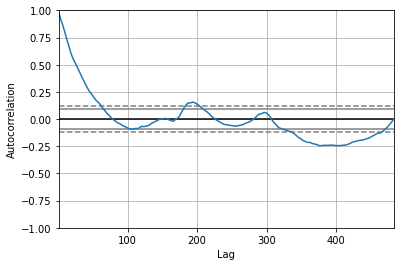

In [9]:
train, test = sp['2019':'2020-11'], sp.loc['2020-12']

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train.close)

An example ARIMA model that fits in a reasonable amount of time:

In [11]:
%%capture
from stock_analysis import StockModeler
arima_model = StockModeler.arima(train, ar=15, i=1, ma=5)


StockModeler.plot_residuals(arima_model)

array([<AxesSubplot:title={'center':'Residuals'}, xlabel='Date', ylabel='Residual'>,
       <AxesSubplot:title={'center':'Residuals KDE'}, xlabel='Residual', ylabel='Density'>],
      dtype=object)

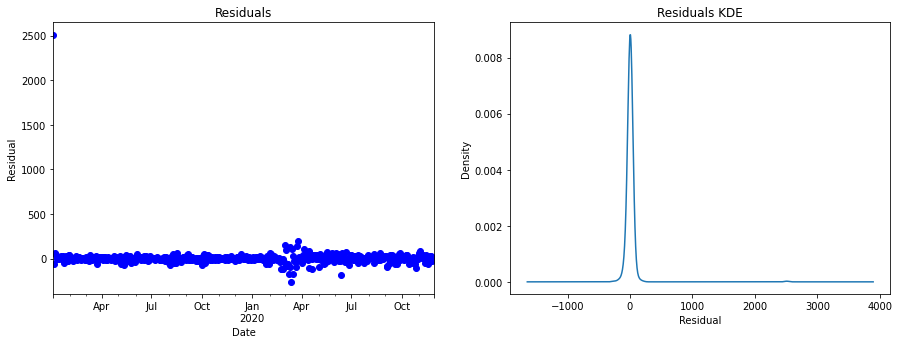

In [12]:
StockModeler.plot_residuals(arima_model)

Compare the ARIMA model's predictions to what actually happened:

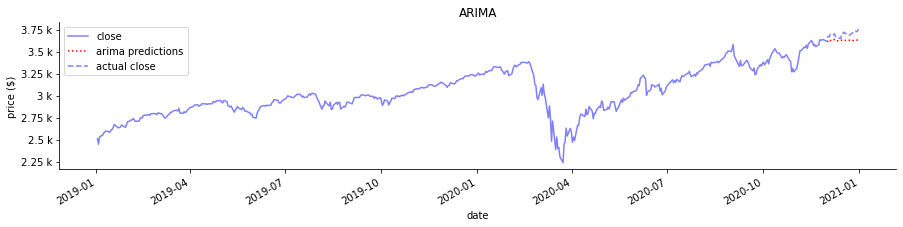

In [13]:
from matplotlib.ticker import EngFormatter

dates = test.index

arima_ax = StockModeler.arima_predictions(
    train, arima_model, start=dates[0], end=dates[-1],
    title='ARIMA', color='b', figsize=(15, 3), alpha=0.5
)
test.close.plot(ax=arima_ax, style='b--', label='actual close', alpha=0.5)
arima_ax.legend()
arima_ax.set_ylabel('price ($)')
arima_ax.yaxis.set_major_formatter(EngFormatter())

for spine in ['top', 'right']:
    arima_ax.spines[spine].set_visible(False)

    7.Request an API key for AlphaVantage (https://www.alphavantage.co/support/#api-key) and collect the daily foreign exchange rate from USD to JPY using the get_forex_rates() method on the same StockReader object you created to collect the data for the previous exercises. Build a candlestick plot with the data from February 2019 through January 2020, resampled to 1-week intervals. 

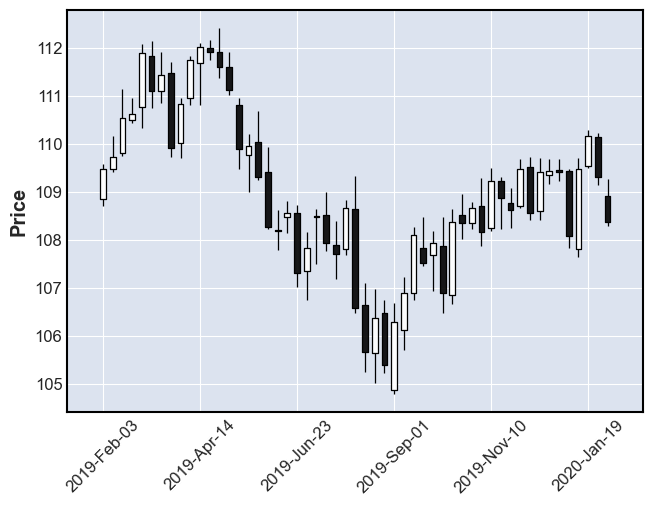

In [16]:
start = '2019-01-01'
end = '2020-12-31'
rdr = stock_analysis.StockReader(start, end)
forex = rdr.get_forex_rates('USD', 'JPY', api_key='OCOZPN9R3O2DR66V')
stock_analysis.StockVisualizer(forex).candlestick(date_range=slice('2019-02-01', '2020-01-31'), resample='1W')